#                             **Insurance Cost Prediction Business Case**
                                 -by Ashwini Vailaya
# **Problem Statement**

Insurance companies need to accurately predict the cost of health insurance for individuals to set premiums appropriately. However, traditional methods of cost prediction often rely on broad actuarial tables and historical averages, which may not account for the nuanced differences among individuals. By leveraging machine learning techniques, insurers can predict more accurately the insurance costs tailored to individual profiles, leading to more competitive pricing and better risk management.



# **Dataset**

We have used Insurance data given in below link: https://drive.google.com/file/d/1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS/view?usp=drive_link

The dataset comprises the following 11 attributes:

Age: Numeric, ranging from 18 to 66 years.

Diabetes: Binary (0 or 1), where 1 indicates the presence of diabetes.

BloodPressureProblems: Binary (0 or 1), indicating the presence of blood pressure-related issues.

AnyTransplants: Binary (0 or 1), where 1 indicates the person has had a transplant.

AnyChronicDiseases: Binary (0 or 1), indicating the presence of any chronic diseases.

Height: Numeric, measured in centimeters, ranging from 145 cm to 188 cm.

Weight: Numeric, measured in kilograms, ranging from 51 kg to 132 kg.

KnownAllergies: Binary (0 or 1), where 1 indicates known allergies.

HistoryOfCancerInFamily: Binary (0 or 1), indicating a family history of cancer.

NumberOfMajorSurgeries: Numeric, counting the number of major surgeries, ranging from 0 to 3 surgeries.

PremiumPrice: Numeric, representing the premium price in currency, ranging from 15,000 to 40,000.


In [ ]:
!gdown https://drive.google.com/file/d/1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS/view?usp=drive_link

/usr/local/lib/python3.12/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS/view?usp=drive_link
To: /content/view?usp=drive_link
53.8kB [00:00, 51.2MB/s]


In [2]:
import pandas as pd
df = pd.read_csv('insurance.csv')

# Structure & Characteristics of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


# **Dataset Shape**

In [ ]:
df.shape

(986, 11)

In [21]:
df.head(5)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Height_m,BMI,BMI_Category,HealthRiskScore
0,45,0,0,0,0,155,57,0,0,0,25000,1.55,23.725286,Normal,0
1,60,1,0,0,0,180,73,0,0,0,29000,1.80,22.530864,Normal,1
2,36,1,1,0,0,158,59,0,0,1,23000,1.58,23.634033,Normal,2
3,52,1,1,0,1,183,93,0,0,2,28000,1.83,27.770313,Overweight,3
4,38,0,0,0,1,166,88,0,0,1,23000,1.66,31.934969,Obese,1


# **Statistical information**


In [ ]:
df.describe(include='all')

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


# Detect null, outliers

In [ ]:
df.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


There is no missing values present in this data set.

In [ ]:
df_duplicated = df[df.duplicated()]
df_duplicated.shape[0]

0

Univariate Analysis

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV # To decide on the best performing model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor # Multicolinearity?
from imblearn.over_sampling import SMOTE # Oversampling

import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix, classification_report

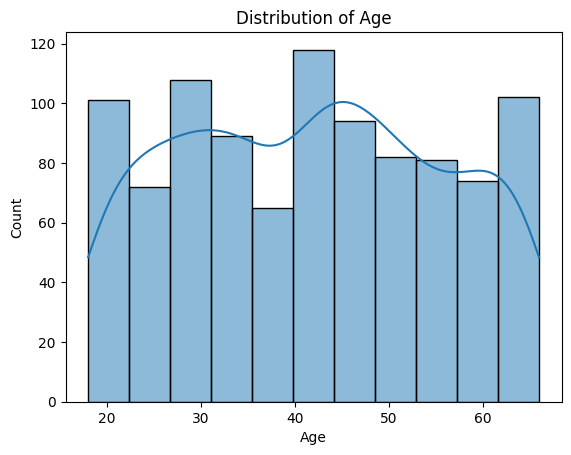

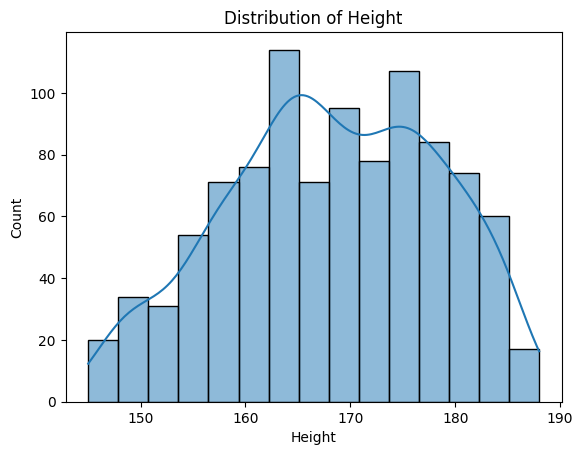

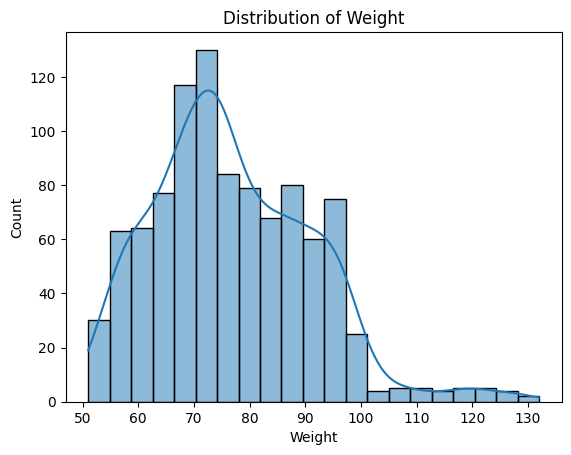

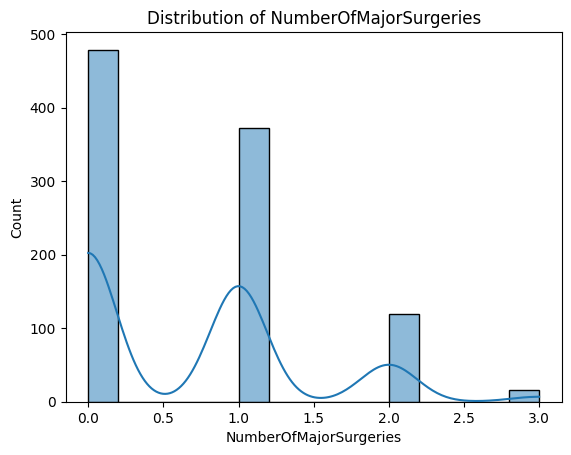

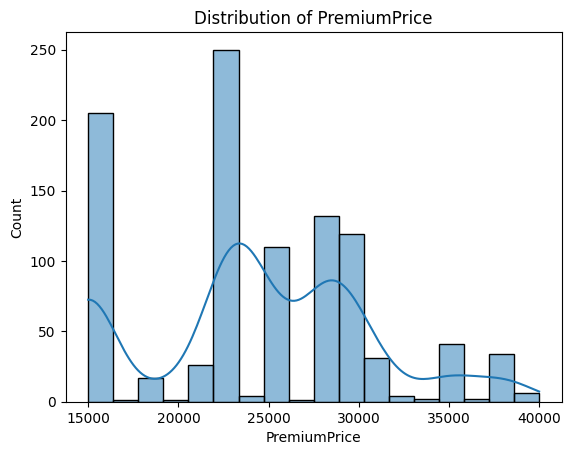

In [ ]:
numeric_cols = ["Age", "Height", "Weight", "NumberOfMajorSurgeries", "PremiumPrice"]

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

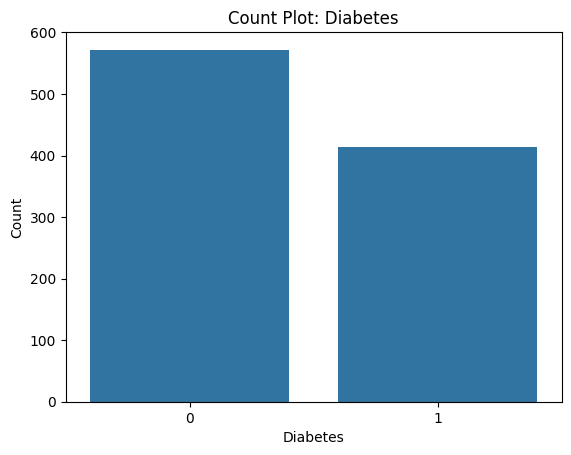

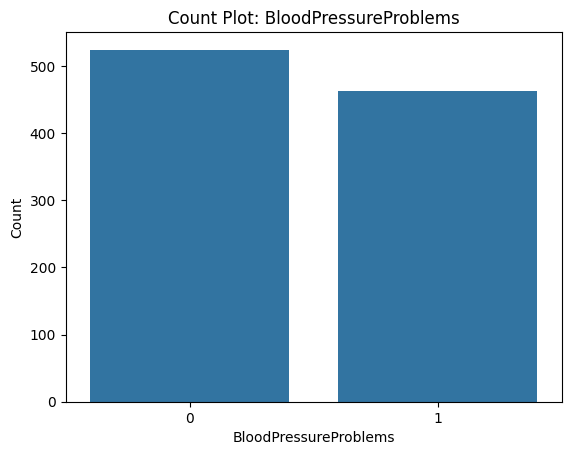

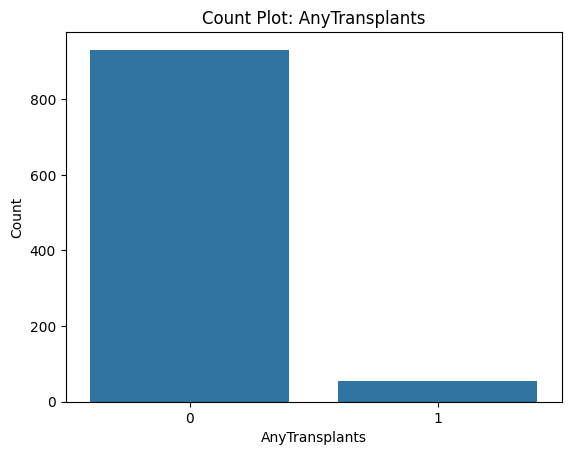

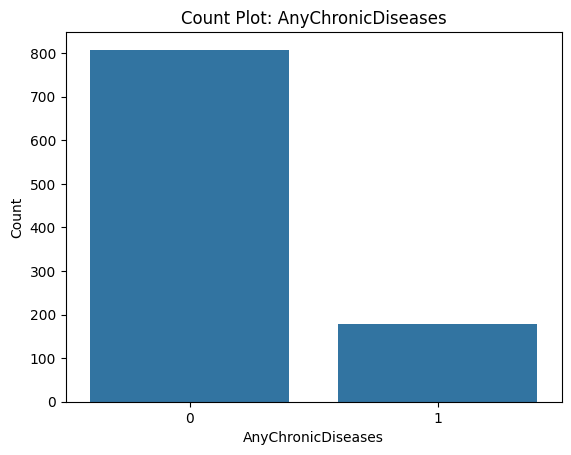

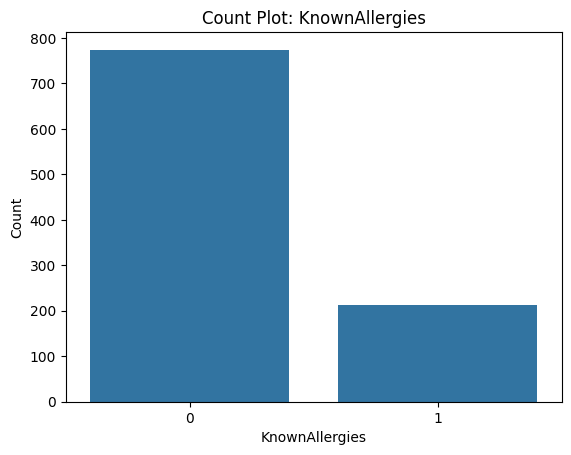

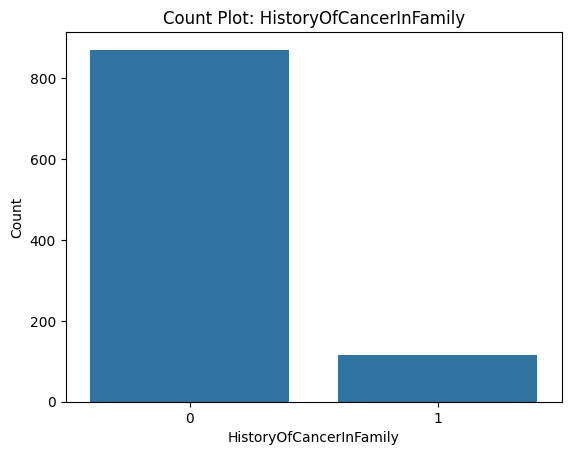

In [ ]:
binary_cols = [
    "Diabetes", "BloodPressureProblems", "AnyTransplants",
    "AnyChronicDiseases", "KnownAllergies", "HistoryOfCancerInFamily"
]

for col in binary_cols:
    plt.figure()
    sns.countplot(x=df[col])
    plt.title(f"Count Plot: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

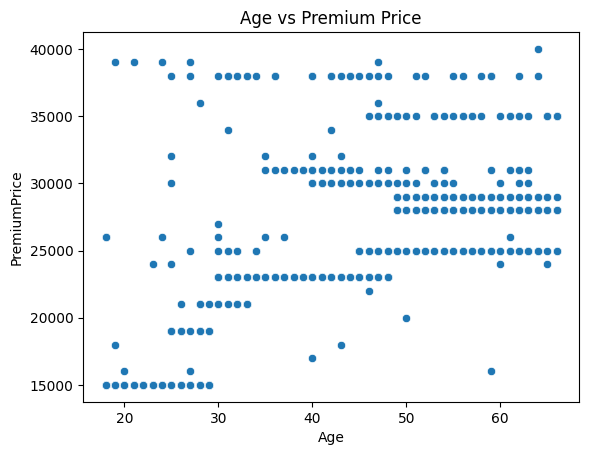

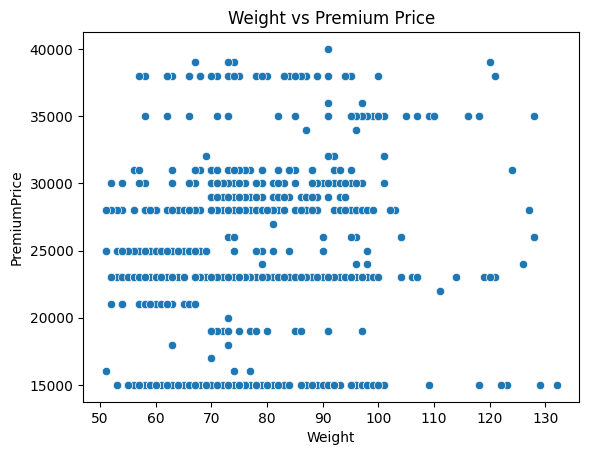

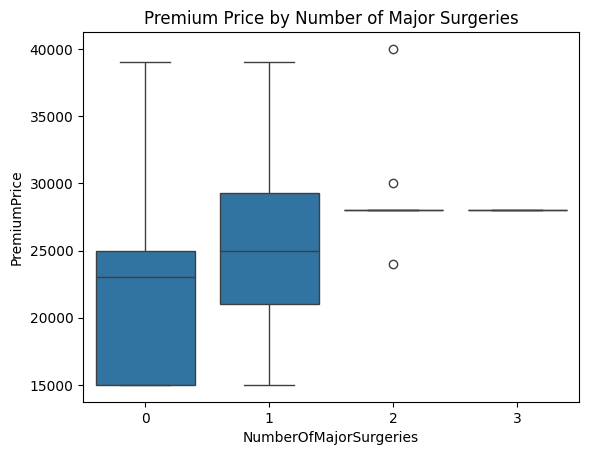

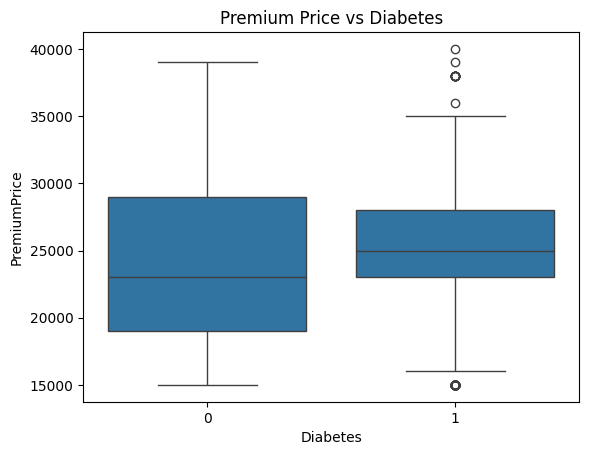

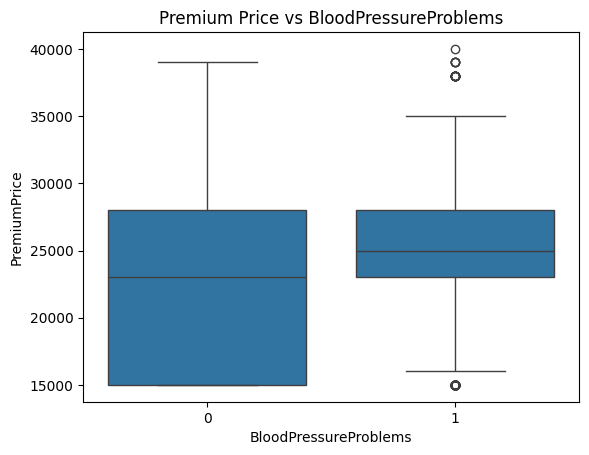

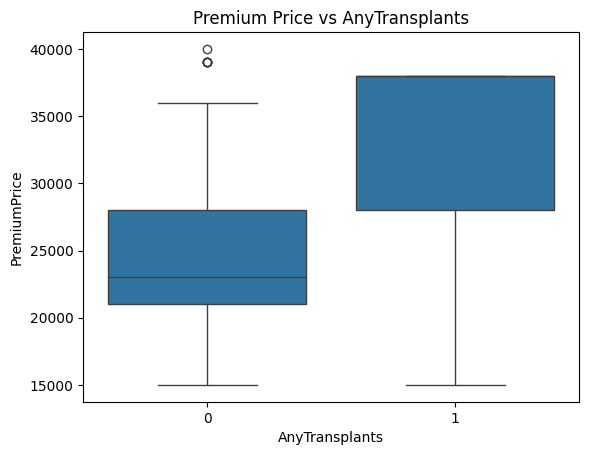

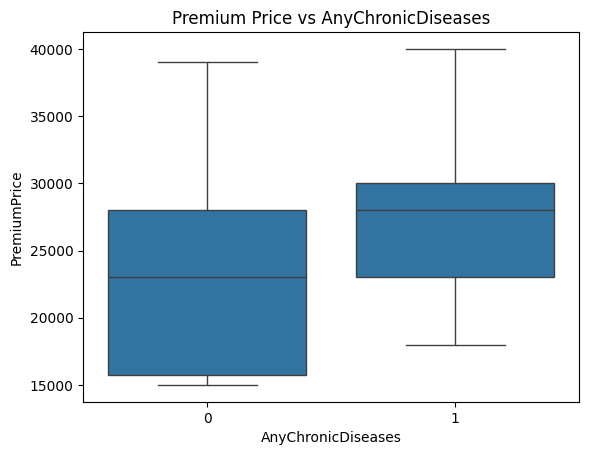

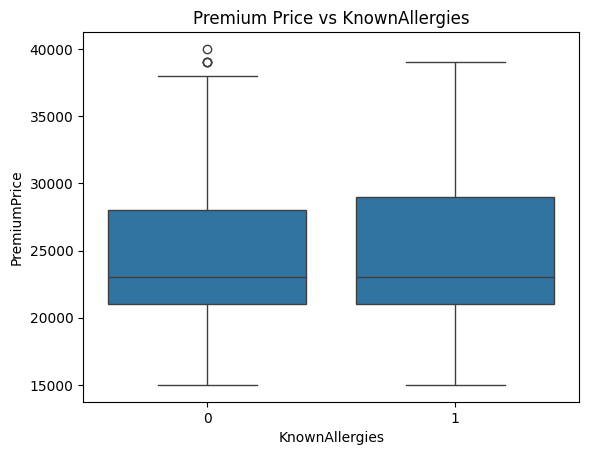

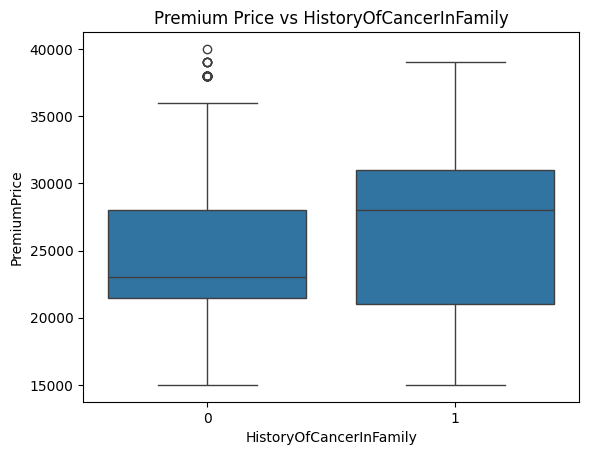

In [ ]:
# Premium vs Age
plt.figure()
sns.scatterplot(x="Age", y="PremiumPrice", data=df)
plt.title("Age vs Premium Price")
plt.show()

# Premium vs Weight (BMI indicator)
plt.figure()
sns.scatterplot(x="Weight", y="PremiumPrice", data=df)
plt.title("Weight vs Premium Price")
plt.show()

# Premium vs Major Surgeries
plt.figure()
sns.boxplot(x="NumberOfMajorSurgeries", y="PremiumPrice", data=df)
plt.title("Premium Price by Number of Major Surgeries")
plt.show()

# Premium difference across health conditions
for col in binary_cols:
    plt.figure()
    sns.boxplot(x=df[col], y=df["PremiumPrice"])
    plt.title(f"Premium Price vs {col}")
    plt.show()

### Correlation Analysis

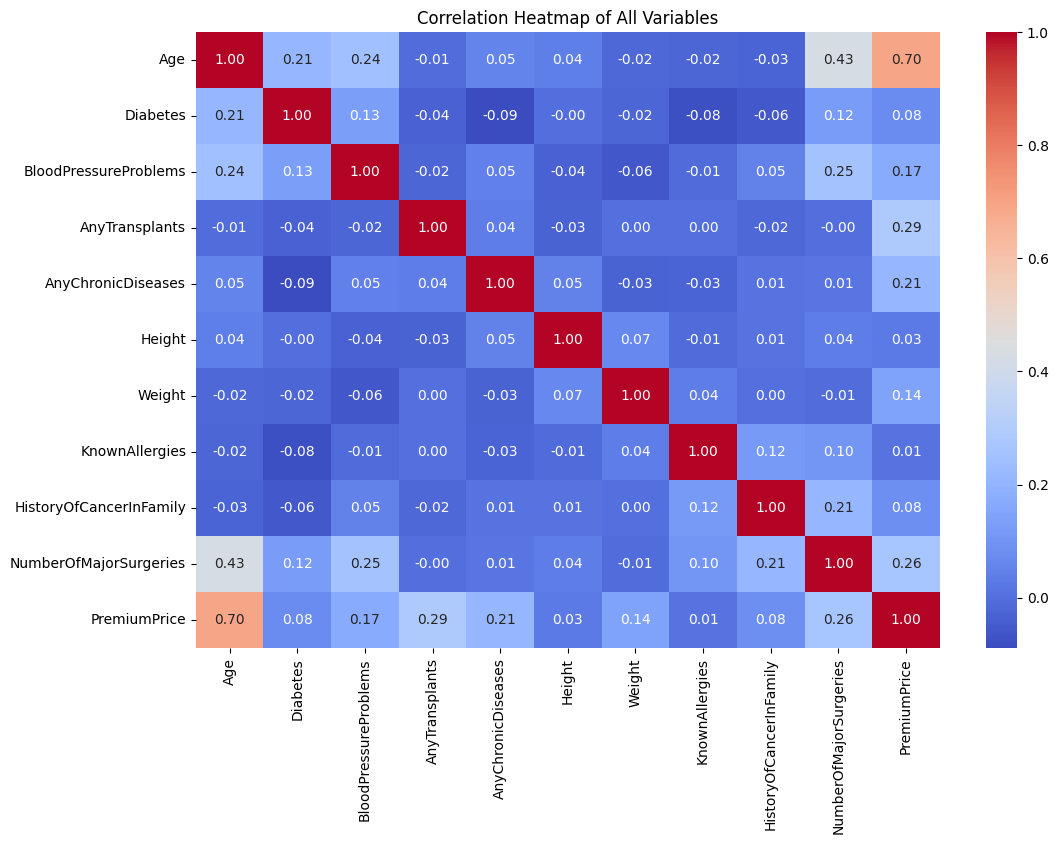

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of All Variables")
plt.show()

## Outlier Detection

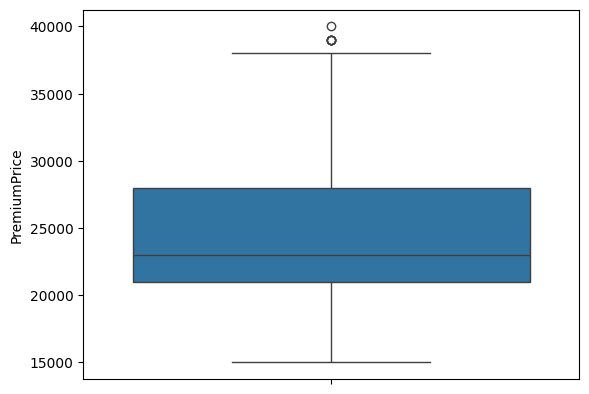

In [16]:
import matplotlib.pyplot as plt
import numpy as np

sns.boxplot(data=df,y='PremiumPrice')
plt.show()

In [6]:
q1=df['PremiumPrice'].quantile(0.25)
q3=df['PremiumPrice'].quantile(0.75)
iqr = q3-q1
outliers = df[((df['PremiumPrice'] <(q1-1.5*iqr)) | (df['PremiumPrice'] >(q3+1.5*iqr)))]
print('No of outliers',len(outliers))

No of outliers 6


In [3]:
# IQR Outlier Removal for PremiumPrice
Q1 = df["PremiumPrice"].quantile(0.25)
Q3 = df["PremiumPrice"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Remove outliers
df_clean = df[(df["PremiumPrice"] >= lower_bound) & (df["PremiumPrice"] <= upper_bound)]

print("Original dataset size:", len(df))
print("Cleaned dataset size:", len(df_clean))
print("Number of outliers removed:", len(df) - len(df_clean))
df = df_clean


Lower Bound: 10500.0
Upper Bound: 38500.0
Original dataset size: 986
Cleaned dataset size: 980
Number of outliers removed: 6


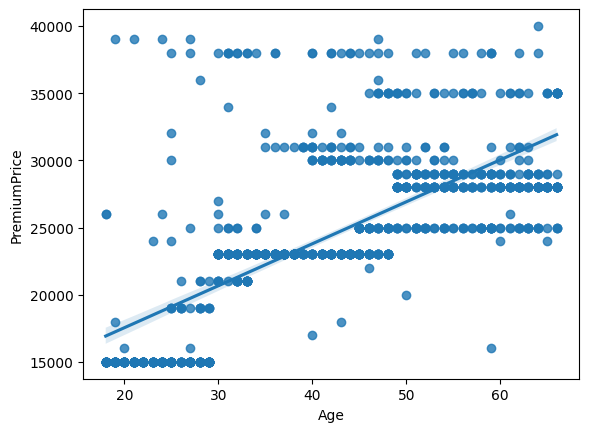

In [11]:
sns.regplot(data=df,y='PremiumPrice',x='Age')
plt.show()

*Analysis* : PremiumPrice and Age are slightly positively corelated. Customers with higher Age also have high Premium Price.

# Statistical test

1. **T-Tests (Independent Samples)**

Compare mean PremiumPrice between two groups (e.g., Diabetes vs No Diabetes).

We perform t-test to identify is there any significant difference in PremiumPrice between two groups (e.g., Diabetes vs No Diabetes).

Step 1 :Define Hypothesis test

Null Hypothesis:PremiumPrice for Diabetes is less or equal to PremiumPrice for Non Diabetes.There is no significant difference in mean premium prices between the two groups.


Alternate Hypothesis: PremiumPrice for Diabetes is greater than  PremiumPrice for Non Diabetes.

Step 2 : Select the statistical test
We go for t-test because population std deviation not known. When n>30 t-test converges to z-test.

Step 3 :Decide significance level
Set significance level to 0.05

In [3]:
# Example: Diabetes vs No Diabetes
from scipy.stats import ttest_ind

group1 = df[df["Diabetes"] == 1]["PremiumPrice"]
group0 = df[df["Diabetes"] == 0]["PremiumPrice"]

t_stat, p_val = ttest_ind(group1, group0, equal_var=False)  # Welch's t-test

print("T-test for PremiumPrice vs Diabetes")
print("T-statistic:", t_stat)
print("P-value:", p_val)

if(p_val < 0.05):
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

T-test for PremiumPrice vs Diabetes
T-statistic: 2.4489285982890396
P-value: 0.014508142994631809
Reject null hypothesis


In [6]:
for col in ["BloodPressureProblems", "AnyTransplants", "AnyChronicDiseases",
            "KnownAllergies", "HistoryOfCancerInFamily"]:

    group1 = df[df[col] == 1]["PremiumPrice"]
    group0 = df[df[col] == 0]["PremiumPrice"]

    t_stat, p_val = ttest_ind(group1, group0, equal_var=False)

    print(f"\nT-test for PremiumPrice vs {col}")
    print("T-statistic:", t_stat)
    print("P-value:", p_val)
    if(p_val < 0.05):
      print("Reject null hypothesis")
    else:
      print("Fail to reject null hypothesis")


T-test for PremiumPrice vs BloodPressureProblems
T-statistic: 5.370281271166068
P-value: 9.813498313247295e-08
Reject null hypothesis

T-test for PremiumPrice vs AnyTransplants
T-statistic: 6.2599390386040215
P-value: 5.544902737541748e-08
Reject null hypothesis

T-test for PremiumPrice vs AnyChronicDiseases
T-statistic: 7.707663368460665
P-value: 1.7279736467737666e-13
Reject null hypothesis

T-test for PremiumPrice vs KnownAllergies
T-statistic: 0.36668963110854214
P-value: 0.7140924633237387
Fail to reject null hypothesis

T-test for PremiumPrice vs HistoryOfCancerInFamily
T-statistic: 2.3567519547641984
P-value: 0.01982822652964323
Reject null hypothesis


**Analysis**:Serious health conditions significantly increase insurance premiums.

**2. ANOVA (for groups with 3+ categories)**

Number of Major Surgeries (0, 1, 2, 3)

H₀: Mean premium prices are equal across all surgery groups.

H₁: At least one group differs significantly.

In [5]:
from scipy.stats import f_oneway

g0 = df[df["NumberOfMajorSurgeries"] == 0]["PremiumPrice"]
g1 = df[df["NumberOfMajorSurgeries"] == 1]["PremiumPrice"]
g2 = df[df["NumberOfMajorSurgeries"] == 2]["PremiumPrice"]
g3 = df[df["NumberOfMajorSurgeries"] == 3]["PremiumPrice"]

f_stat, p_val = f_oneway(g0, g1, g2, g3)

print("ANOVA: PremiumPrice across NumberOfMajorSurgeries")
print("F-statistic:", f_stat)
print("P-value:", p_val)

if(p_val < 0.05):
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

ANOVA: PremiumPrice across NumberOfMajorSurgeries
F-statistic: 26.1353935974076
P-value: 2.8711631377228097e-16
Reject null hypothesis


**Analysis**:Premium prices increase significantly as the number of major surgeries increases, confirming surgical history as a major cost driver.

**3. Chi-Square Test (Relationship between categorical variables)**
Chronic Disease vs Family Cancer History

In [7]:
import scipy.stats as stats
import pandas as pd

contingency = pd.crosstab(df["AnyChronicDiseases"], df["HistoryOfCancerInFamily"])

chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("Chi-square Test: Chronic Disease vs Cancer History")
print("Chi-square value:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

if(p_val < 0.05):
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")


Chi-square Test: Chronic Disease vs Cancer History
Chi-square value: 0.02062393388215223
P-value: 0.8858081638149811
Degrees of freedom: 1
Expected frequencies:
 [[712.94117647  95.05882353]
 [157.05882353  20.94117647]]
Reject null hypothesis


**Analysis**:There is significant association between the two categorical features i.e Chronic Disease vs Family Cancer History.There is a statistically significant association between having chronic diseases and a family history of cancer, suggesting overlapping health risk profiles.

In [8]:
import statsmodels.api as sm

# Select predictors (you can add/remove variables)
X = df[[
    "Age", "Diabetes", "BloodPressureProblems", "AnyTransplants",
    "AnyChronicDiseases", "Weight", "Height",
    "KnownAllergies", "HistoryOfCancerInFamily",
    "NumberOfMajorSurgeries"
]]

y = df["PremiumPrice"]

# Add constant term
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     175.5
Date:                Sat, 13 Dec 2025   Prob (F-statistic):          3.92e-210
Time:                        10:58:32   Log-Likelihood:                -9508.6
No. Observations:                 986   AIC:                         1.904e+04
Df Residuals:                     975   BIC:                         1.909e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

## Data Preprocessing for ML Modeling

### Feature Engineering

1. Body Mass Index (BMI)

BMI is a strong health risk indicator.

In [4]:
# Convert height from cm to meters
df["Height_m"] = df["Height"] / 100

# Create BMI feature
df["BMI"] = df["Weight"] / (df["Height_m"] ** 2)


2.BMI Category

In [5]:
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df["BMI_Category"] = df["BMI"].apply(bmi_category)


3. Risk Score

In [6]:
risk_features = [
    "Diabetes", "BloodPressureProblems",
    "AnyTransplants", "AnyChronicDiseases",
    "KnownAllergies", "HistoryOfCancerInFamily"
]

df["HealthRiskScore"] = df[risk_features].sum(axis=1)


## Scaling and Encoding

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


X = df.drop(columns=["PremiumPrice"])
y = df["PremiumPrice"]

numeric_cols = [
    "Age", "Height", "Weight", "BMI",
    "NumberOfMajorSurgeries", "HealthRiskScore"
]

binary_cols = [
    "Diabetes", "BloodPressureProblems",
    "AnyTransplants", "AnyChronicDiseases",
    "KnownAllergies", "HistoryOfCancerInFamily"
]

categorical_cols = ["BMI_Category"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("bin", "passthrough", binary_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ]
)

from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Training data shape:", X_train_processed.shape)
print("Testing data shape:", X_test_processed.shape)


Training data shape: (784, 15)
Testing data shape: (196, 15)


### ML Models with Cross-Validation

In [9]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(
        n_estimators=200,
        random_state=42
    )
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "RMSE": "neg_root_mean_squared_error",
    "R2": "r2"
}

results = []

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", model)
    ])

    cv_results = cross_validate(
        pipeline,
        X, y,
        cv=kfold,
        scoring=scoring,
        return_train_score=False
    )

    results.append({
        "Model": name,
        "RMSE (mean)": -cv_results["test_RMSE"].mean(),
        "RMSE (std)": cv_results["test_RMSE"].std(),
        "R2 (mean)": cv_results["test_R2"].mean()
    })

results_df = pd.DataFrame(results).sort_values(by="RMSE (mean)")
print(results_df)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.041e+08, tolerance: 2.987e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.175e+08, tolerance: 2.831e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.464e+08, tolerance: 3.081e

               Model  RMSE (mean)  RMSE (std)  R2 (mean)
3      Random Forest  2312.016250  340.209523   0.854693
1   Ridge Regression  3509.156917  265.358571   0.670887
2   Lasso Regression  3510.506683  259.880258   0.670611
0  Linear Regression  3510.507449  259.877634   0.670610


### Train Best Model on Full Dataset

In [10]:
best_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=300,
        random_state=42
    ))
])

best_model.fit(X, y)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'BMI',
                                                   'NumberOfMajorSurgeries',
                                                   'HealthRiskScore']),
                                                 ('bin', 'passthrough',
                                                  ['Diabetes',
                                                   'BloodPressureProblems',
                                                   'AnyTransplants',
                                                   'AnyChronicDiseases',
                                                   'KnownAllergies',
                                                   'HistoryOfCancerInFamily']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['BMI_Category'])])),
                ('model',
                 RandomForestRegressor(n_estimators=300, random_state=42))])

### Feature Importance (Random Forest)

In [11]:
feature_names = (
    numeric_cols +
    binary_cols +
    list(best_model.named_steps["preprocessing"]
         .transformers_[2][1]
         .get_feature_names_out(categorical_cols))
)

importances = best_model.named_steps["model"].feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_importance_df.head(10))


                    Feature  Importance
0                       Age    0.681263
8            AnyTransplants    0.104498
2                    Weight    0.064553
9        AnyChronicDiseases    0.036989
4    NumberOfMajorSurgeries    0.035418
3                       BMI    0.026751
11  HistoryOfCancerInFamily    0.023138
1                    Height    0.012317
5           HealthRiskScore    0.004518
7     BloodPressureProblems    0.003594


### Hyperparameter Tuning

In [14]:
param_grid = {
    "model__n_estimators": [200, 300],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 200}


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=300,
        random_state=42
    ))
])

pipeline.fit(X, y)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'BMI',
                                                   'NumberOfMajorSurgeries',
                                                   'HealthRiskScore']),
                                                 ('bin', 'passthrough',
                                                  ['Diabetes',
                                                   'BloodPressureProblems',
                                                   'AnyTransplants',
                                                   'AnyChronicDiseases',
                                                   'KnownAllergies',
                                                   'HistoryOfCancerInFamily']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['BMI_Category'])])),
                ('model',
                 RandomForestRegressor(n_estimators=300, random_state=42))])

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = best_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.3f}")


Test RMSE: 6244071.07
Test R²: 0.831


In [16]:
feature_names = (
    numeric_cols +
    binary_cols +
    list(
        best_model.named_steps["preprocessing"]
        .transformers_[2][1]
        .get_feature_names_out(categorical_cols)
    )
)

importances = best_model.named_steps["model"].feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_importance_df.head(10))


                    Feature  Importance
0                       Age    0.695380
8            AnyTransplants    0.112550
2                    Weight    0.059606
9        AnyChronicDiseases    0.042252
4    NumberOfMajorSurgeries    0.033236
11  HistoryOfCancerInFamily    0.020749
3                       BMI    0.016257
1                    Height    0.010538
5           HealthRiskScore    0.004189
7     BloodPressureProblems    0.002440


## Recommendations:

1. Age is the strongest determinant of insurance
premium prices.

2. Transplants,Chronic diseases and Surgical interventions have the highest impact.

3. Lifestyle-related conditions (diabetes, BP) slightly increase costs.

4. Physical attributes (height, weight) play a secondary role.

5. Some genetic or family indicators do not directly influence premium pricing.

6. Insurance providers should prioritize Age,Transplants and surgical history in pricing models.

7. Preventive healthcare strategies may reduce long-term premium costs.

## Deployment Process

Create pickle file containing trained model.

In [17]:
import joblib

In [25]:
model_path = "insurance_premium_model.pkl"
joblib.dump(pipeline, model_path)

['insurance_premium_model.pkl']

In [26]:
import os
os.listdir()

['.config', 'insurance_premium_model.pkl', 'insurance.csv', 'sample_data']

In [27]:
# Load model back
loaded_model = joblib.load("insurance_premium_model.pkl")

# Test prediction
sample_input = X.iloc[[0]]
prediction = loaded_model.predict(sample_input)

print("Test Prediction:", prediction)


Test Prediction: [24920.]


In [28]:
from google.colab import files
files.download("insurance_premium_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


















-






















-